<a href="https://colab.research.google.com/github/Laxmiprasanna2930/pytorch_fundamentals/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch WorkFlow

**Chapter 1**

In [4]:
## Import PyTorch and matplotlib

In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt
# check Pytorch version
torch.__version__

'2.1.0+cu121'

In [6]:
# setup device agnostic code

In [7]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using devices:(device)")

using devices:(device)


In [8]:
!nvidia-smi

Tue Feb 13 12:26:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [9]:
# create some data using the linear regression formula of y=weight * X+bias

In [10]:
weight=0.7
bias=0.3
# create range values
start=0
end=1
step=0.02
# create X and Y (features and labels)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [11]:
# split data

In [12]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [13]:
# Plot the data

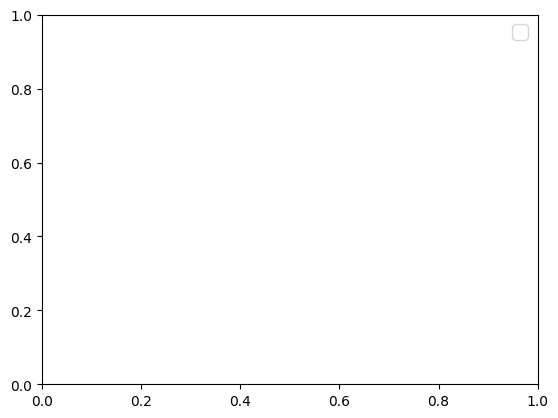

In [14]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  ''' Plots training data,test data and compares predictions'''
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
# Show the legend
plt.legend(prop={"size":14});


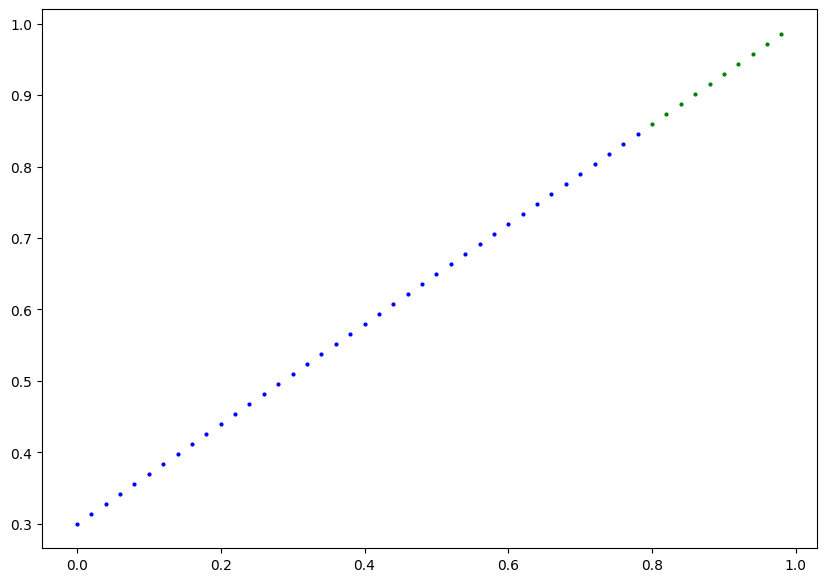

In [15]:
plot_predictions();

### 2. Build model


what our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)
How does it do so?
Through two main algorithms:
*  Gradient descent
*  Back propagation





In [16]:
from torch import nn
# create linear regression model class
class LinearRegressionModel(nn.Module): #<- alomst everything in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights *x+self.bias

### PyTorch model building essentials

In [17]:
#torch.nn - contains all of the buildings for computational graphs (a neural network can be considered as computational graph)

### Checking the contents of our PyTorch model

In [18]:
# Create a random seed

In [19]:
torch.manual_seed(42)
# create an instance of the model (this is a subclass of nn.Module)
model_0=LinearRegressionModel()
# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
weight,bias

(0.7, 0.3)

### Making prediction using torch.inference_mode()

In [22]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [23]:
y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [24]:
# make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test)
# you can also do something similar with torch.no_grad()
with torch.no_grad():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [25]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

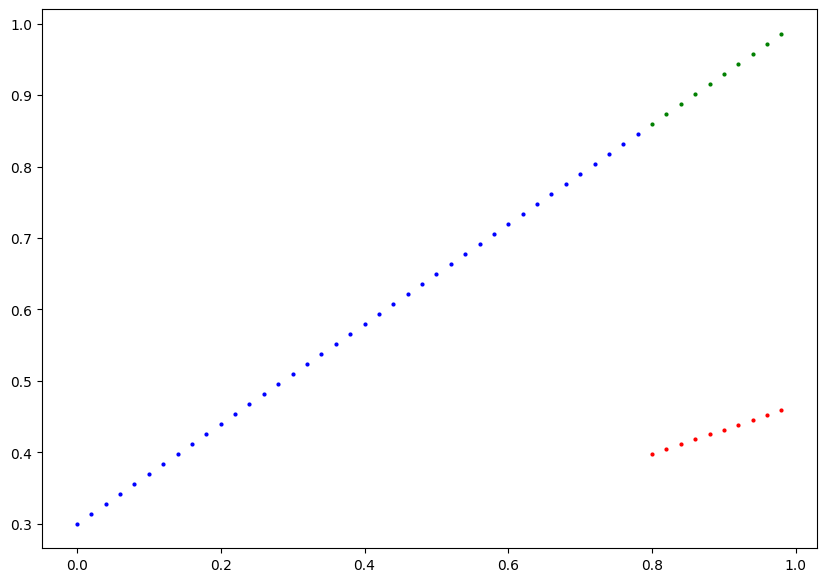

In [26]:
plot_predictions(predictions=y_preds)

### 3.Train model
**Loss function:** a function to measure how wrong your model's predictions are to the ideal outputs,lower is better.
**Optimizer:** takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

In [27]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
# check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
# setup a loss function
loss_fn=nn.L1Loss()
# setup an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01) # lr=learning rate=possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0.Loop through the data
1.Forward pass (this involves data moving through our model's 'forward()' functions) to make predictions on data-also called forward propagation
2.calculate the loss (compare forward pass predictions to ground truth labels)
3.Optimizer zero grad
4.Loss backward
5.Optimizer step

In [30]:
with torch.no_grad():
  list(model_0.parameters())

In [31]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [32]:
# An epoch is one loop through the data...
epochs=200
epoch_count=[]
loss_values=[]
test_loss_values=[]
### Training
# 0.Loop through the data
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
  # 1.Forward pass
  y_pred=model_0(X_train)
  # 2.calculate the loss
  loss=loss_fn(y_pred,y_train)
  # print(f"Loss:{loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()
  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()
  ### Testing
  model_0.eval() # turn off different settings in the model not needed for evaluation/testing(dropout)
  with torch.inference_mode():
    #with torch.no_grad():
    # !. Do the forward pass
    test_pred=model_0(X_test)
    # 2. calculate the loss
    test_loss=loss_fn(test_pred,y_test)
    if epoch %10==0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch:{epoch} | Loss:{loss} | Test loss:{test_loss}")
      print(model_0.state_dict())

Epoch:0 | Loss:0.31288138031959534 | Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.1976713240146637 | Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss:0.08908725529909134 | Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss:0.053148526698350906 | Test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss:0.04543796554207802 | Test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss:0.04167863354086876 | Test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss:0.03818932920694351 | Test loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70 | Loss

In [33]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

In [34]:
epoch_count,loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

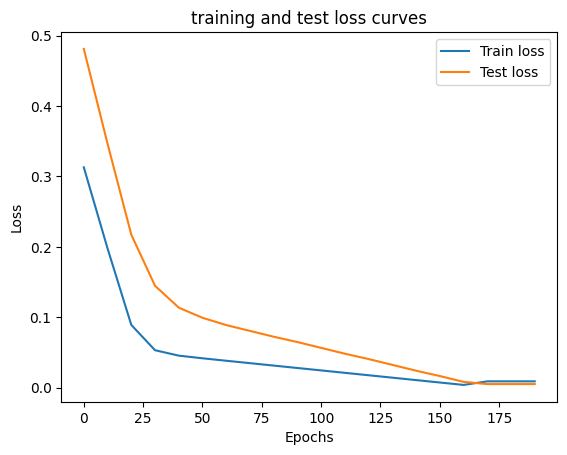

In [35]:
# plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [36]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
weight,bias

(0.7, 0.3)

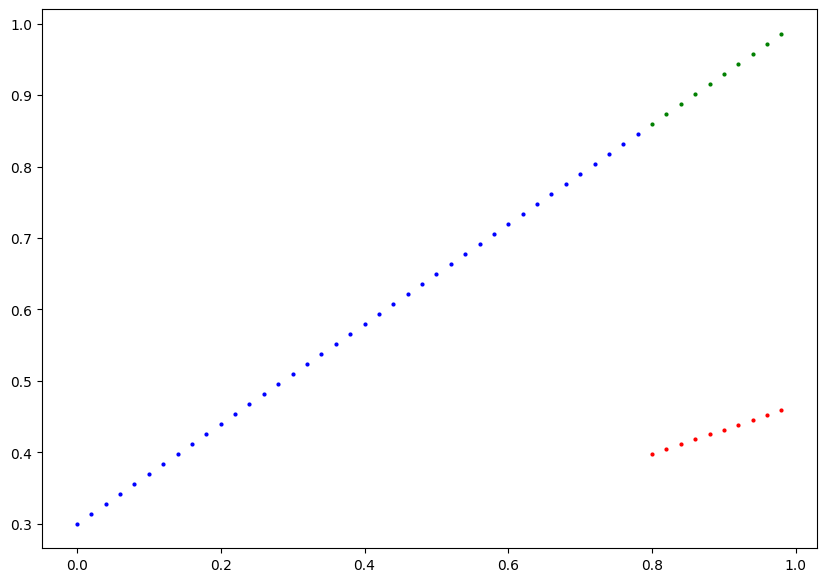

In [39]:
plot_predictions(predictions=y_preds);

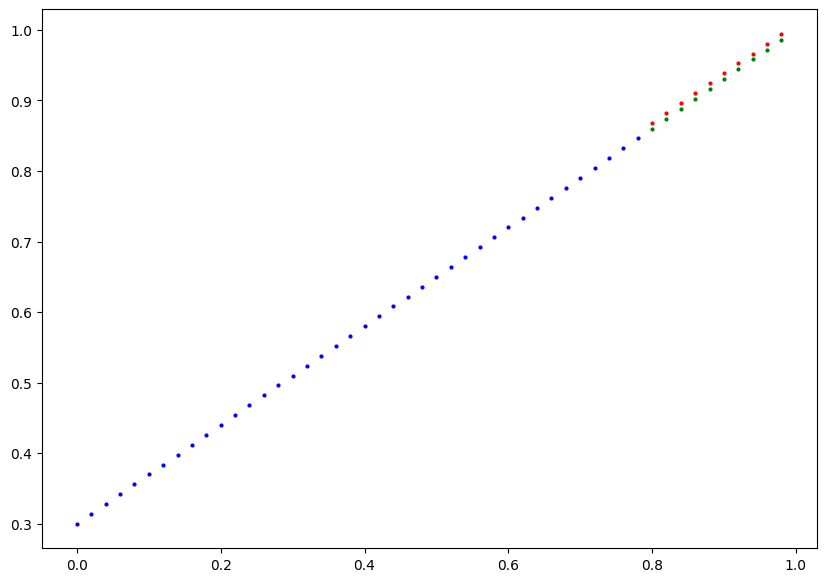

In [40]:
plot_predictions(predictions=y_preds_new);

### Saving a model in PyTorch
There are three main methods you should about for saving and loading models in PyTorch.
1. `torch.save()`
2. `torch.load()`
3. `torch.nn.Module.load_state_dict()`





In [41]:
# saving our PyTorch model
from pathlib import Path
# 1. create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [42]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Feb 13 12:26 01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

In [43]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [44]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [45]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [46]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [47]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [48]:
# Compare loaded model preds with original model preds
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

In [49]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
# Check Pytorch version
torch.__version__

'2.1.0+cu121'

### Create device-agnostic code.
This means if we've got access to a GPU,our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU

In [50]:
# Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f" Using devices:{device}")

 Using devices:cuda


### 6.1 Data

In [51]:
# create some data using the linear regression formula of y=weight * X + bias
weight=0.7
bias=0.3
# create range values
start=0
end=1
step=0.02
# create x and y (features and labels)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [52]:
# split data
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

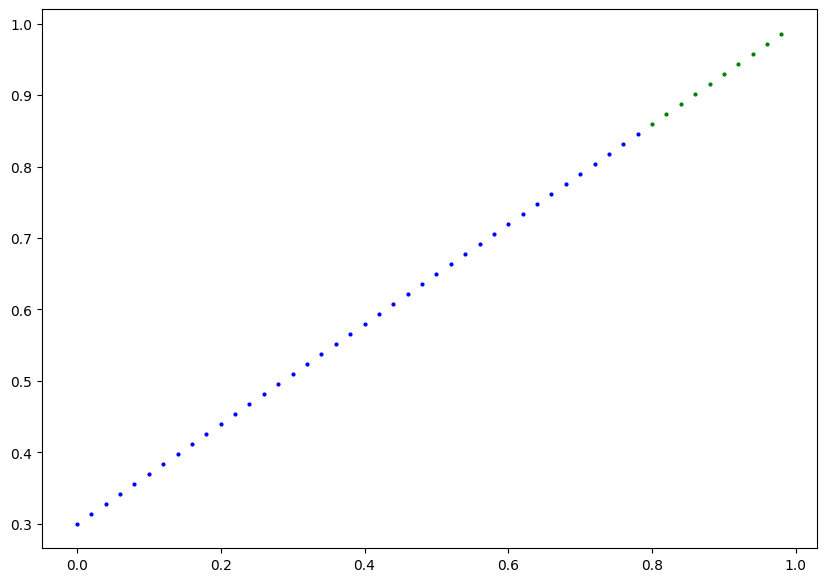

In [53]:
# Plot the data
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a PyTorch Linear model

In [54]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters/ also called linear transform,probing layer
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x:torch.tensor) -> torch.Tensor:
    return self.linear_layer(x)
# set the manual seed
torch.manual_seed(42)
model_l=LinearRegressionModelV2()
model_l,model_l.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [55]:
X_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [56]:
# Check the model current device
next(model_l.parameters()).device

device(type='cpu')

In [57]:
# Set the model to use the target device
model_l.to(device)
next(model_l.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop




In [58]:
# Setup loss function
loss_fn=nn.L1Loss() # same as MAE
# Setup our optimizer
optimizer=torch.optim.SGD(params=model_l.parameters(),
                          lr=0.01)

In [60]:
# Let's write a traing loop
torch.manual_seed(42)
epochs=200
# Put data on the target device (device agnostic code for data)
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
  model_l.train()
  # 1.Forward pass
  y_pred=model_l(X_train)
  # 2. Calculate the loss
  loss=loss_fn(y_pred,y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. perform backpropagation
  loss.backward()
  # 5. Optimizer step
  optimizer.step()
  ### Testing
  model_l.eval()
  with torch.inference_mode():
    test_pred=model_l(X_test)
    test_loss=loss_fn(test_pred,y_test)
    # Print out what's happening
  if epoch % 10==0:
    print(f"Epoch:{epoch} | Loss:{loss} | test loss:{test_loss}")

Epoch:0 | Loss:0.5551779866218567 | test loss:0.5739762187004089
Epoch:10 | Loss:0.439968079328537 | test loss:0.4392664134502411
Epoch:20 | Loss:0.3247582018375397 | test loss:0.30455657839775085
Epoch:30 | Loss:0.20954833924770355 | test loss:0.16984669864177704
Epoch:40 | Loss:0.09433845430612564 | test loss:0.03513690456748009
Epoch:50 | Loss:0.023886388167738914 | test loss:0.04784907028079033
Epoch:60 | Loss:0.019956795498728752 | test loss:0.045803118497133255
Epoch:70 | Loss:0.016517987474799156 | test loss:0.037530567497015
Epoch:80 | Loss:0.013089174404740334 | test loss:0.02994490973651409
Epoch:90 | Loss:0.009653178043663502 | test loss:0.02167237363755703
Epoch:100 | Loss:0.006215683650225401 | test loss:0.014086711220443249
Epoch:110 | Loss:0.00278724217787385 | test loss:0.005814164876937866
Epoch:120 | Loss:0.0012645035749301314 | test loss:0.013801801018416882
Epoch:130 | Loss:0.0012645035749301314 | test loss:0.013801801018416882
Epoch:140 | Loss:0.0012645035749301314

In [61]:
model_l.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [62]:
weight,bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [63]:
# Turn model into evaluation mode
model_l.eval()
# make predictions on the test data
with torch.inference_mode():
  y_preds=model_l(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

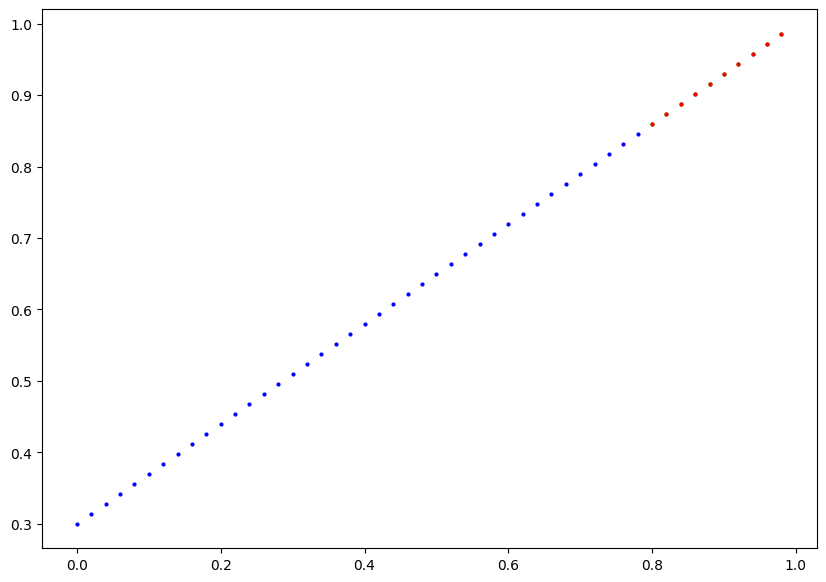

In [65]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving & Loading a trained model

In [76]:
from pathlib import Path
# 1. Create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
# 2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_l.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [75]:
model_l.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [78]:
# Load a PyTorch
# create a new instance of linear regression model V2
loaded_model_l=LinearRegressionModelV2()
# Load the saved model_l state_dict
loaded_model_l.load_state_dict(torch.load(MODEL_SAVE_PATH))
# Put the loaded model to device
loaded_model_l.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [80]:
next(loaded_model_l.parameters()).device

device(type='cuda', index=0)

In [81]:
loaded_model_l.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [83]:
# Evaluate loaded model
loaded_model_l.eval()
with torch.inference_mode():
  loaded_model_l_preds=loaded_model_l(X_test)
y_preds==loaded_model_l_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')